# Converting the data from csv to sql through pyhton and uploading the dataset in sql

In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('order_items.csv', 'order_items'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),  # Added the missing comma here
    ('geolocation.csv', 'geolocation')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Adarsh Singh/OneDrive/Desktop/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm          

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerce')

cur = db.cursor()

# Basic Queries

# 1. List all unique cities where customers are located.

In [6]:
query = """  select distinct customer_city from customers  """
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [25]:
query = """   select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall() 
#data
"Total order placed in 2017 are",data[0][0]
# when we run data then the output was [(45101,)]
#To make the data in tuple we write data[0][0] then the output is 45101

('Total order placed in 2017 are', 45101)

# 3. Find the total sales per category.

In [42]:
query = """  select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
data = cur.fetchall()
data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [44]:
# to get the above data in table and more understandable format
df =pd.DataFrame(data,columns =["Category", "Sales"] )
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# 4. Calculate the percentage of orders that were paid in installments.

In [63]:
query = """  select round(((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100), 3) from payments
"""
cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments are",data[0][0]

('the percentage of orders that were paid in installments are',
 Decimal('99.998'))

# 5. Count the number of customers from each state. 

In [70]:
query = """  select customer_state, count(customer_id) customer_count from ecommerce.customers
group by customer_state """
cur.execute(query)
data = cur.fetchall()
data

[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

In [94]:
df = pd.DataFrame(data,columns =["State", "Customer_Count"] )
df

,State,Customer_Count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


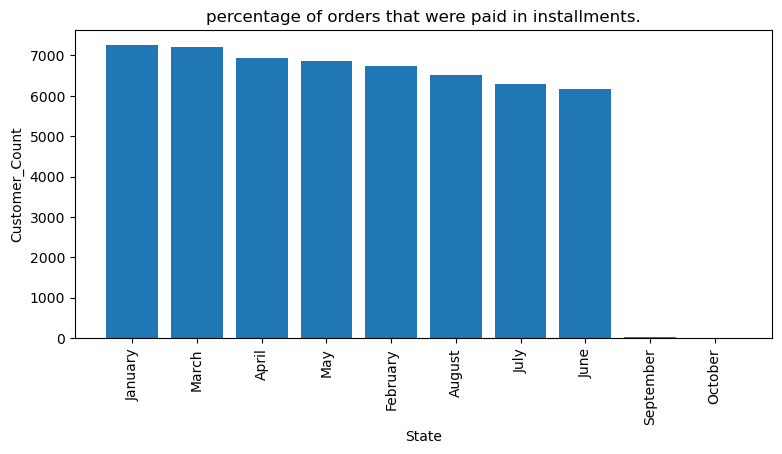

In [155]:
df = pd.DataFrame(data,columns =["State", "Customer_Count"] )
df =df.sort_values(by ="Customer_Count", ascending = False) #Is use to arrange the value in desceding or ascending order
plt.figure(figsize =(9,4)) #Is use to increase or decrease the size of the fig
plt.bar(df["State"],df["Customer_Count"])#Is use to display the barchart
plt.xticks(rotation = 90)# Is use to rotate the name of state
plt.xlabel("State")
plt.ylabel("Customer_Count")
plt.title("percentage of orders that were paid in installments.") 
plt.show()

# Intermediate Queries

# 1. Calculate the number of orders per month in 2018.

In [111]:
query = """  select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months"""
cur.execute(query)
data = cur.fetchall()
data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

In [113]:
df = pd.DataFrame(data,columns =["Month", "order_count"] )
df

,Month,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


# In Matplotlib

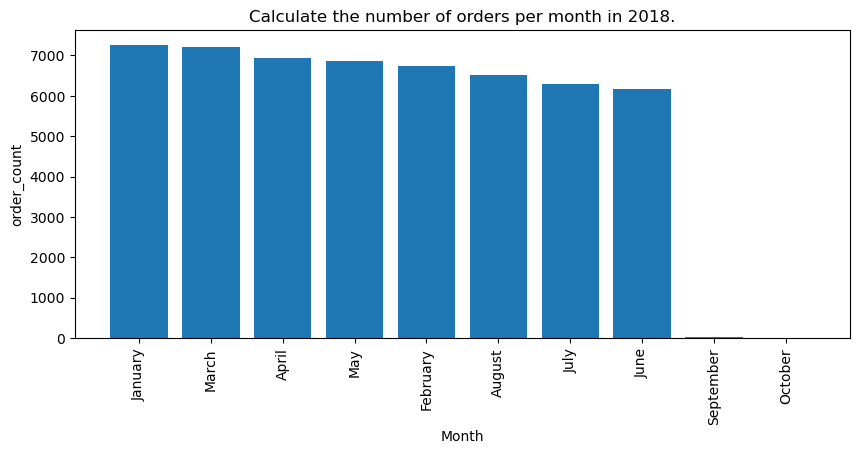

In [143]:
df =df.sort_values(by ="order_count", ascending = False) #Is use to arrange the value in desceding or ascending order
plt.figure(figsize =(10,4)) #Is use to increase or decrease the size of the fig
plt.bar(df["Month"],df["order_count"])#Is use to display the barchart
plt.xticks(rotation = 90)# Is use to rotate the name of state
plt.xlabel("Month")
plt.ylabel("order_count")
plt.title("Calculate the number of orders per month in 2018.") 
plt.show()

# In Seaborn

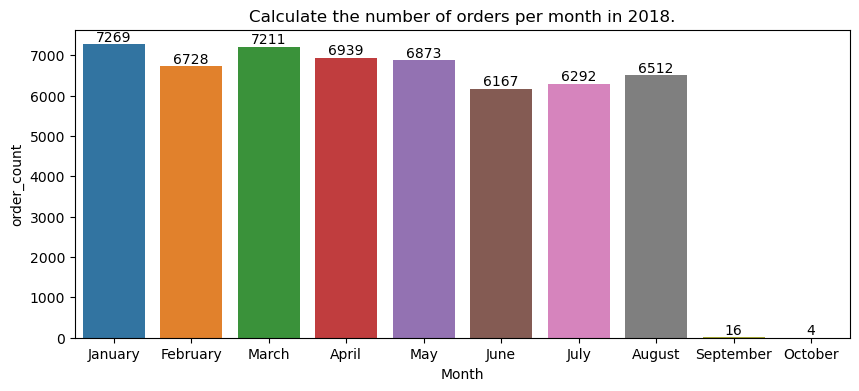

In [163]:
df = pd.DataFrame(data,columns =["Month", "order_count"] )
df =df.sort_values(by ="order_count", ascending = False) #Is use to arrange the value in desceding or ascending order
plt.figure(figsize =(10,4))
o = ["January","February","March","April","May","June","July","August","September","October"]
ax = sns.barplot(x = df["Month"],y = df["order_count"],data = df ,order = o)
ax.bar_label(ax.containers[0])
plt.title("Calculate the number of orders per month in 2018.") 
plt.show()

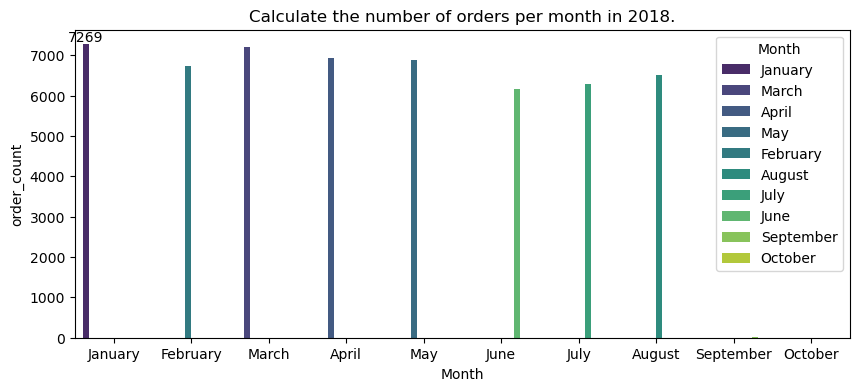

In [173]:
# Using hue,palette and color
df = pd.DataFrame(data,columns =["Month", "order_count"] )
df =df.sort_values(by ="order_count", ascending = False) #Is use to arrange the value in desceding or ascending order
plt.figure(figsize =(10,4))
o = ["January","February","March","April","May","June","July","August","September","October"]
ax = sns.barplot(x = df["Month"],y = df["order_count"],data = df ,order = o, hue = df["Month"],palette = "viridis") #using multiple color
#ax = sns.barplot(x = df["Month"],y = df["order_count"],data = df ,order = o, color = "red") #using single color
ax.bar_label(ax.containers[0])
plt.title("Calculate the number of orders per month in 2018.") 
plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [97]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by average_orders desc"""
cur.execute(query)
data = cur.fetchall()
data

[('padre carvalho', Decimal('7.00')),
 ('celso ramos', Decimal('6.50')),
 ('candido godoi', Decimal('6.00')),
 ('datas', Decimal('6.00')),
 ('matias olimpio', Decimal('5.00')),
 ('morro de sao paulo', Decimal('4.00')),
 ('cidelandia', Decimal('4.00')),
 ('picarra', Decimal('4.00')),
 ('teixeira soares', Decimal('4.00')),
 ('curralinho', Decimal('4.00')),
 ('inconfidentes', Decimal('3.50')),
 ('ipua', Decimal('3.25')),
 ('alto paraiso de goias', Decimal('3.00')),
 ('capela', Decimal('3.00')),
 ('ubata', Decimal('3.00')),
 ('nova esperanca do sul', Decimal('3.00')),
 ('pedregulho', Decimal('3.00')),
 ('ouvidor', Decimal('3.00')),
 ('jose boiteux', Decimal('3.00')),
 ('pacuja', Decimal('3.00')),
 ('brasileia', Decimal('3.00')),
 ('chapadao do lageado', Decimal('3.00')),
 ('buriti', Decimal('3.00')),
 ('colonia castrolanda', Decimal('2.67')),
 ('ubajara', Decimal('2.67')),
 ('maracana', Decimal('2.50')),
 ('colonia jordaozinho', Decimal('2.50')),
 ('sao miguel dos campos', Decimal('2.50'))

In [99]:
df = pd.DataFrame(data,columns =["customer city", "average products/order"] )
df

,customer city,average products/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
...,...,...
4105,sebastiao leal,1.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


# In Matplotlib

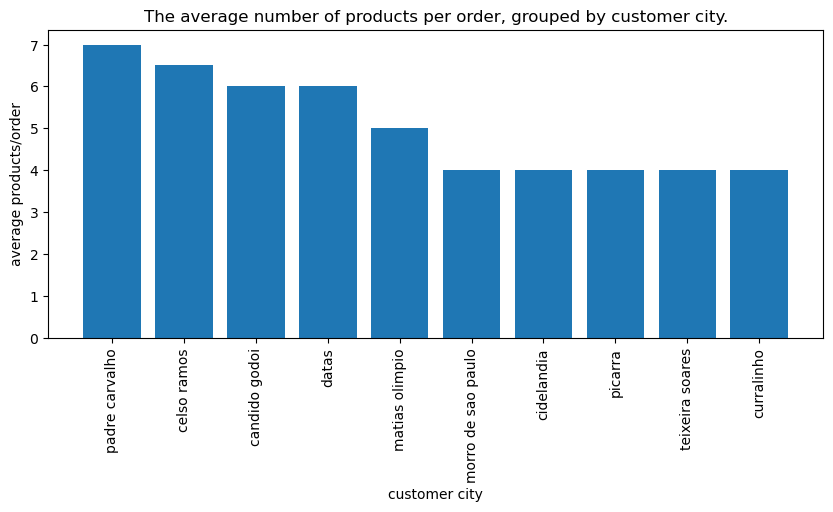

In [101]:
#2
df = pd.DataFrame(data,columns =["customer city", "average products/order"] )
df = df.head(10)
df =df.sort_values(by ="average products/order", ascending = False) #Is use to arrange the value in desceding or ascending order
plt.figure(figsize =(10,4)) #Is use to increase or decrease the size of the fig
plt.bar(df["customer city"],df["average products/order"])#Is use to display the barchart
plt.xticks(rotation = 90)# Is use to rotate the name of state
plt.xlabel("customer city")
plt.ylabel("average products/order")
plt.title("The average number of products per order, grouped by customer city.") 
plt.show()

# 3. Calculate the percentage of total revenue contributed by each product category.

In [49]:
query = """  select upper(products.product_category) category,
round(sum(payments.payment_value)/(select sum(payment_value)from payments)*100,2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by sales desc
"""
cur.execute(query)
data = cur.fetchall()
data

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('CASA CONSTRUCAO', 0.85),
 ('ROOM FURNITURE', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('CONSTRUCTION TOOLS ILLUMINATION',

In [20]:
df = pd.DataFrame(data,columns =["category", "percentage distribution"] )
df

,category,sales
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [66]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]
a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157562


In [61]:
df = pd.DataFrame(data,columns =["category", "order_count","price"] )
df

,category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [79]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(SELECT order_items.seller_id,
round(sum(payments.payment_value), 5) 
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a 
"""
cur.execute(query)
data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 507166.9073, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.03984, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.26977, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42013, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.0805, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.31931, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.12094, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.3005, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.22987, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.20971, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.74905, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.80003, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.73977, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91019, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.34007, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04013, 16),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 145267.94987, 17),
 ('cc419e0650a3c5ba77189a1882b7556a', 14130

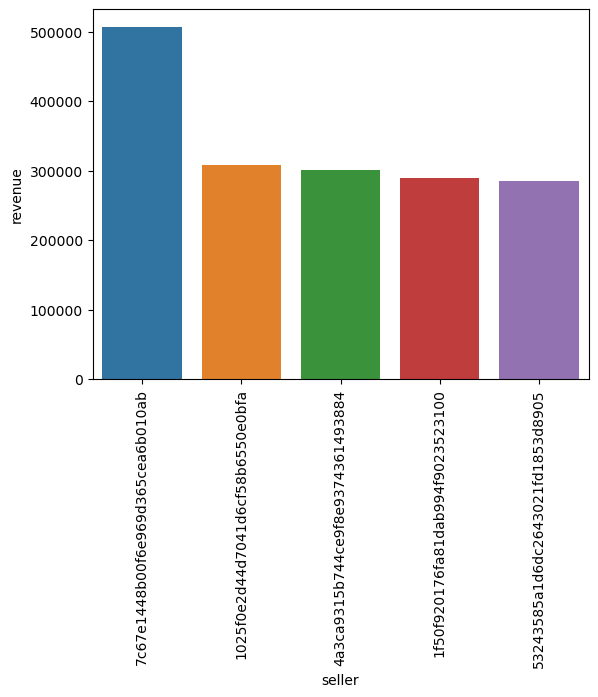

In [87]:
df = pd.DataFrame(data,columns =["seller", "revenue","Ranking"] )
df = df.head(5)
sns.barplot(x ="seller", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Advanced Queries

# 1. Calculate the moving average of order values for each customer over their order history.

In [111]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(SELECT orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
FROM ecommerce.payments join ecommerce.orders
on payments.order_id = orders.order_id) as a;"""
cur.execute(query)
data = cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35,
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01,
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.8,
  71.80000305175781),
 ('000419c5494106c306a97b5635748086',
  '2018-03-02 17:47:40',
  49.4,
  49.400001525878906),
 ('00046a560d407e99b969756e0b10f282',
  '2017-12-18 11:08:30',
  166.59,
  166.58999633789062),
 ('00050bf6e01e69d5c0fd612f1bcfb69c',
  '2017-09-17 16:04:44',
  85.23,
  85.2300033569336),
 ('000598caf2ef4117407665ac33275130',
  '2018-08-11 12:14:35',
  1255.71,
  1255.7099609375),
 ('0005aefbb696d34b3424dccd0a0e9fd0',
  '2018-06-20 0

In [121]:
df = pd.DataFrame(data,columns =["customer_id", "purchase_timestamp", "payment","avg_payment"] )
df = df.head(10)
df

,customer_id,purchase_timestamp,payment,avg_payment
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


# 2. Calculate the cumulative sales per month for each year.

In [124]:
query = """ select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
monthname(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from ecommerce.orders join  ecommerce.payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a"""
cur.execute(query)
data = cur.fetchall()
data

[(2016, 'December', 19.62, 19.62),
 (2016, 'October', 59090.48, 59110.100000000006),
 (2016, 'September', 252.24, 59362.340000000004),
 (2017, 'April', 417788.03, 477150.37000000005),
 (2017, 'August', 674396.32, 1151546.69),
 (2017, 'December', 878401.48, 2029948.17),
 (2017, 'February', 291908.01, 2321856.1799999997),
 (2017, 'January', 138488.04, 2460344.2199999997),
 (2017, 'July', 592382.92, 3052727.1399999997),
 (2017, 'June', 511276.38, 3564003.5199999996),
 (2017, 'March', 449863.6, 4013867.1199999996),
 (2017, 'May', 592918.82, 4606785.9399999995),
 (2017, 'November', 1194882.8, 5801668.739999999),
 (2017, 'October', 779677.88, 6581346.619999999),
 (2017, 'September', 727762.45, 7309109.069999999),
 (2018, 'April', 1160785.48, 8469894.549999999),
 (2018, 'August', 1022425.32, 9492319.87),
 (2018, 'February', 992463.34, 10484783.209999999),
 (2018, 'January', 1115004.18, 11599787.389999999),
 (2018, 'July', 1066540.75, 12666328.139999999),
 (2018, 'June', 1023880.5, 13690208.63

In [126]:
df = pd.DataFrame(data,columns =["year", "month", "sale","cumulative_sales"] )
df = df.head(10)
df

,year,month,sale,cumulative_sales
0,2016,December,19.62,19.62
1,2016,October,59090.48,59110.10
2,2016,September,252.24,59362.34
3,2017,April,417788.03,477150.37
4,2017,August,674396.32,1151546.69
5,2017,December,878401.48,2029948.17
6,2017,February,291908.01,2321856.18
7,2017,January,138488.04,2460344.22
8,2017,July,592382.92,3052727.14
9,2017,June,511276.38,3564003.52


# 3. Calculate the year-over-year growth rate of total sales.

In [23]:
query = """ 
with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from ecommerce.orders join  ecommerce.payments
on orders.order_id = payments.order_id
group by years
order by years)
select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""
cur.execute(query)
data = cur.fetchall()
data

[(2016, None), (2017, 12112.703761340945), (2018, 20.00092381158259)]

In [20]:
df = pd.DataFrame(data,columns =["year", "yoy % growth"] )
df 

,year,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [25]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# 5. Identify the top 3 customers who spent the most money in each year.

In [28]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.550048828125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.739990234375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.780029296875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.080078125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31005859375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66015625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.8798828125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.2099609375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.43994140625, 3)]

In [30]:
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
df

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


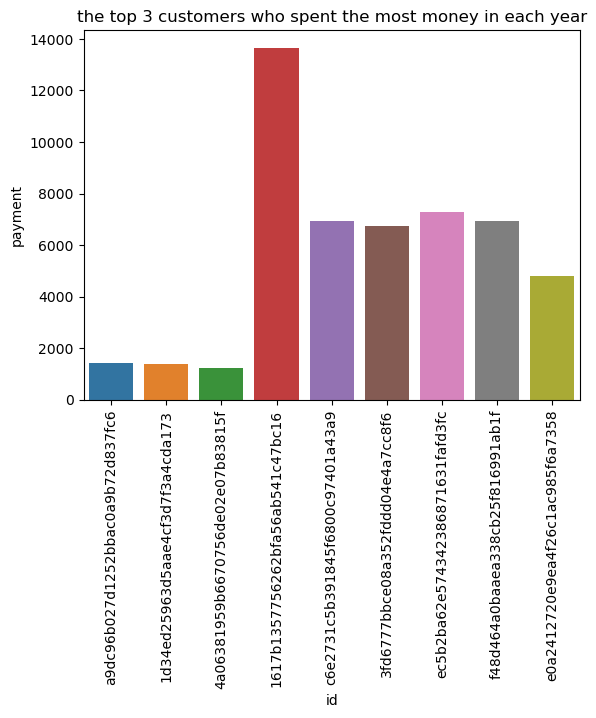

In [46]:
#sns.barplot(x = "id", y = "payment", data = df, hue = "years")
#plt.show()

sns.barplot(x ="id", y = "payment", data = df)
plt.xticks(rotation = 90)
plt.title("the top 3 customers who spent the most money in each year")
plt.show()